In [1]:
print(5)

5


In [48]:
import sys
sys.path.append(".")

from test import myClass

newClass = myClass(19)
val = newClass.getVal()

print(val)

57


In [49]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
from scipy import stats
from IPython.display import HTML, display


plt.rcdefaults()

In [50]:
emails = pd.read_csv(r"C:\Users\AALEKH\Downloads\spam.csv", encoding="iso8859-1")
emails[['v1','v2']].head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:

import sys
sys.path.append(".")

#from source import TfidfVectorizer
import source
# instantiate a Tfidf vectorizer
vect = source.TfidfVectorizer(analyzer="word")
# obtain vocabulary dictionary and return doc-term matrix
X = vect.fit_transform(emails.v2) 
# get the identified terms
terms = vect.get_feature_names()
# sum terms' frequencies in the entire collection
freqs = X.toarray().sum(axis=0)
terms = np.array(terms)
freqs = np.array(freqs)

# organize the tersm and frequencies in t and f columns
tfs = pd.DataFrame({'t':terms, 'f':freqs}, columns=['t','f'])

In [53]:
tfs = tfs.sort_values(by=['f'], ascending=False)
tfs = tfs.reset_index(drop=True)
tfs.head()

,t,f
0,you,245.978616
1,to,205.865267
2,the,147.009403
3,in,122.283484
4,me,117.899742


In [54]:
import source
source.__file__

'C:\\Users\\AALEKH\\STAR\\source.py'

In [21]:
# from sklearn.feature_extraction.text import CountVectorizer

# # instantiate a count vectorizer
# vect = CountVectorizer(analyzer="word")
# # obtain vocabulary dictionary and return doc-term matrix
# X = vect.fit_transform(emails.v2) 
# # get the identified terms
# terms = vect.get_feature_names()
# # sum terms' frequencies in the entire collection
# freqs = X.toarray().sum(axis=0)
# terms = np.array(terms)
# freqs = np.array(freqs)

# # organize the tersm and frequencies in t and f columns
# tfs = pd.DataFrame({'t':terms, 'f':freqs}, columns=['t','f'])


In [22]:
# tfs = tfs.sort_values(by=['f'], ascending=False)
# tfs = tfs.reset_index(drop=True)
# tfs.head()

,t,f
0,to,2242
1,you,2240
2,the,1328
3,and,979
4,in,898


In [55]:
tfs['k'] = tfs.index + 1
tfs[['t','k','f']].head()

,t,k,f
0,you,1,245.978616
1,to,2,205.865267
2,the,3,147.009403
3,in,4,122.283484
4,me,5,117.899742


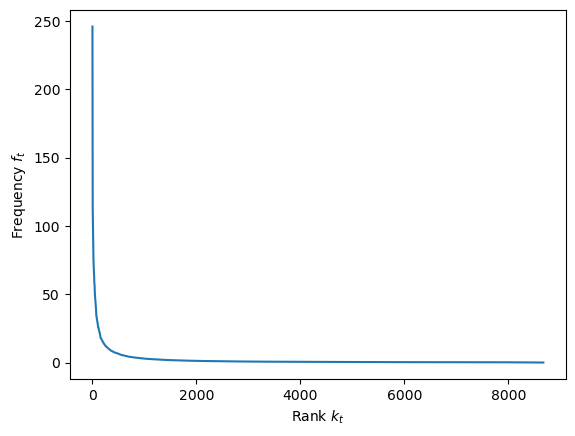

In [56]:
plt.plot(tfs['k'], tfs['f'])
plt.xlabel('Rank $k_t$')
plt.ylabel('Frequency $f_t$')
plt.show()

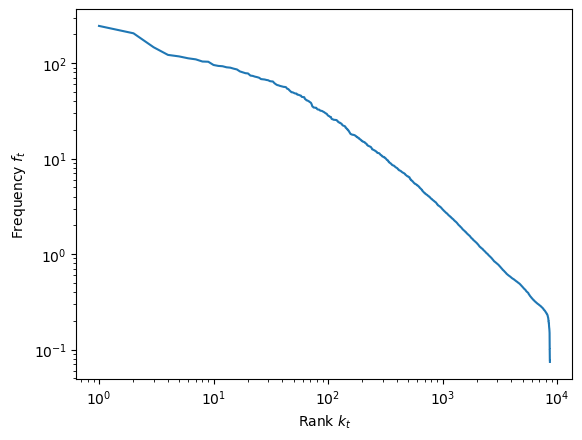

In [57]:
plt.loglog(tfs['k'], tfs['f'])
plt.xlabel('Rank $k_t$')
plt.ylabel('Frequency $f_t$')
plt.show()

In [58]:
ttf = tfs['f'].sum()
tfs['p'] = tfs['f'] / ttf
tfs[['t','k','p']].head()

,t,k,p
0,you,1,0.013514
1,to,2,0.011310
2,the,3,0.008077
3,in,4,0.006718
4,me,5,0.006477


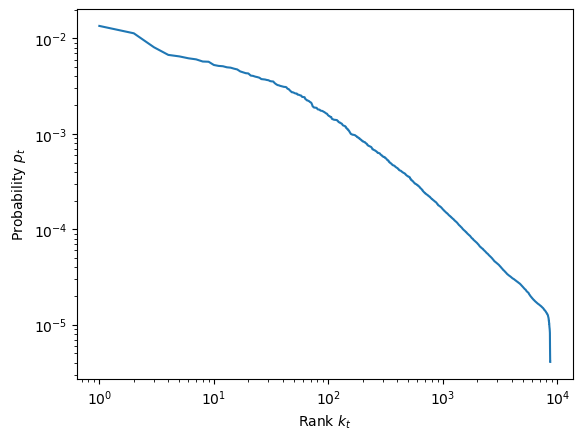

In [59]:
plt.loglog(tfs['k'], tfs['p'])
plt.xlabel('Rank $k_t$')
plt.ylabel('Probability $p_t$')
plt.show()

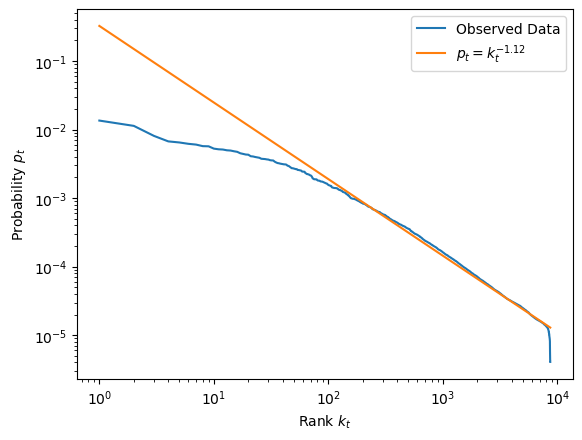

In [60]:
from sklearn.linear_model import LinearRegression

# log transformation of k and p values
x = tfs['k'].values.reshape(-1,1)
xlog = np.log(x)
y = tfs['p'].values.reshape(-1,1)
ylog = np.log(y)

# perform linear regression on log values
lm = LinearRegression()
lm.fit(xlog,ylog)
yplog = lm.predict(xlog)

# plot the fitted (predicted) line 
# along with actual k_t and p_t data
plt.loglog(tfs['k'], tfs['p'], label="Observed Data")
plt.loglog(x, np.exp(yplog), 
           label="$p_t = k_t^{" + "{:.2f}".format(lm.coef_[0][0]) + "}$")
plt.xlabel('Rank $k_t$')
plt.ylabel('Probability $p_t$')
plt.legend()
plt.show()

In [61]:
train_index = np.random.rand(len(emails)) < 0.8
print(train_index)

[ True  True  True ...  True False False]


In [62]:
train = emails[train_index]
test = emails[~train_index]

In [63]:
n = train.shape[0]
counts = train.groupby("v1")["v1"].value_counts()
print(counts)
ham = counts[0]
# compute probability
p_ham = ham / n
print("p(ham) = {:.3f}".format(p_ham))

v1    v1  
ham   ham     3839
spam  spam     589
Name: v1, dtype: int64
p(ham) = 0.867


In [64]:
# get the total number of spams
spam = counts[1]
# compute probability
p_spam = spam / n
print("p(spam) = {:.3f}".format(p_spam))

p(spam) = 0.133


In [65]:
vect = source.TfidfVectorizer(analyzer="word")
X_train = vect.fit_transform(train.v2)
X_test = vect.transform(test.v2)
ham_index = train['v1']=='ham'
hams = train[ham_index]
spams = train[~ham_index]
X_hams = vect.transform(hams.v2)
X_spams = vect.transform(spams.v2)
X_hams.shape

(3839, 7731)

In [66]:
terms = vect.get_feature_names()
t = "prize"
i = terms.index(t)
print("The {:d}th term is: {:s}".format(i, t))

The 5401th term is: prize


In [67]:
hamf = X_hams.toarray().sum(axis=0)
hamttf = hamf.sum()
f = hamf[i]
p = f / hamttf
ps = (f+1)/(hamttf+2)
print("p({:s}|ham) = {:.7f}, smoothed to {:.7f}".format(t, p, ps))

p(prize|ham) = 0.0000000, smoothed to 0.0000837


In [68]:
terms = vect.get_feature_names()
spamf = X_spams.toarray().sum(axis=0)
spamttf = spamf.sum()
f = spamf[i]
p = f / hamttf
ps = (f+1)/(spamttf+2)
print("p({:s}|spam) = {:.7f}, smoothed to {:.7f}".format(t, p, ps))

p(prize|spam) = 0.0012044, smoothed to 0.0059969


In [69]:
t1 = terms.index("prize")
t2 = terms.index("meeting")
t1, t2

(5401, 4416)

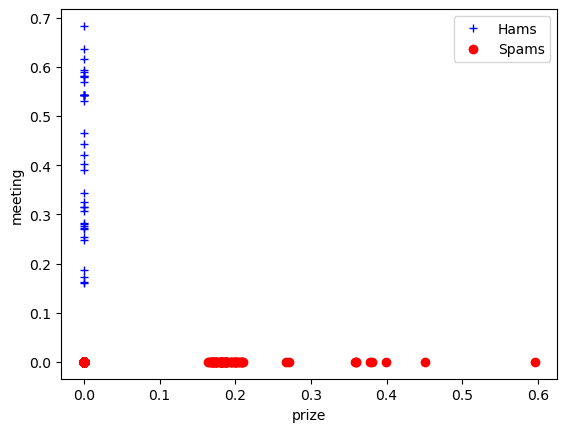

In [70]:
# Example to plot two term (column vectors) on x and y
plt.plot(X_hams.toarray()[:,t1], X_hams.toarray()[:,t2], '+', color="blue", label="Hams")
plt.plot(X_spams.toarray()[:,t1], X_spams.toarray()[:,t2], 'o', color="red", label="Spams")
plt.xlabel("prize")
plt.ylabel("meeting")
plt.legend()

In [71]:
from sklearn.naive_bayes import BernoulliNB

# build the Bernoulli Naive Bayes classifiers
# with parameters, such as: 
# 1. alpha value for the Laplace estimator (smoothing)
# 2. binarize, the threshold/cutoff for 0 or 1 values
bNB = BernoulliNB(alpha=.01, binarize=0.0)
bNB.fit(X_train, train.v1)
v1p = bNB.predict(X_test)

In [72]:
print(v1p)

['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']


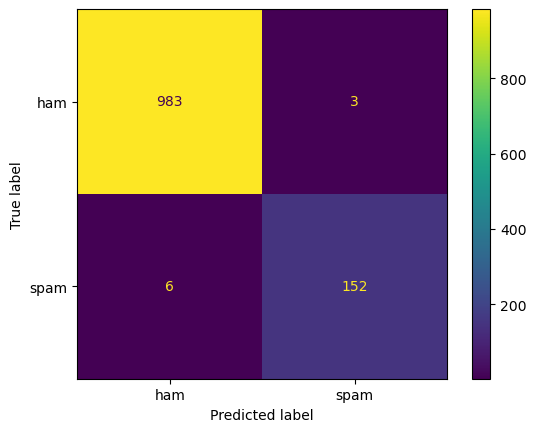

In [73]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(v1p, test.v1)
display(plot_confusion_matrix(bNB, X_test, test.v1, values_format='d'))

In [76]:
from sklearn.metrics import accuracy_score, cohen_kappa_score 
acc = accuracy_score(v1p, test.v1)
kappa = cohen_kappa_score(v1p, test.v1)

print("Accuracy: {:.4f}".format(acc))
print("Kappa   : {:.4f}".format(kappa))

Accuracy: 0.9921
Kappa   : 0.9667


In [77]:
from sklearn.metrics import classification_report
print(classification_report(v1p,test.v1))

              precision    recall  f1-score   support

         ham       1.00      0.99      1.00       989
        spam       0.96      0.98      0.97       155

    accuracy                           0.99      1144
   macro avg       0.98      0.99      0.98      1144
weighted avg       0.99      0.99      0.99      1144

